<img src="https://en.guidingdata.com/wp-content/uploads/2021/04/dice-3332310_1280-1024x576.jpg" width="350px" align="right">

# Monte Carlo Simulations: Portfolio Optimization
----

Luc C. Smith

## Summary & Methods:
----

This report discusses an implementation of Monte Carlo Simulations for portfolio optimization and asset allocation. Here, this technique is used to construct many random portfolios of equities in order to find three specific popular portfolio types: minimum risk, maximum return, and maximum Sharpe Ratio. 33 stocks from the S&P 500 are chosen to do this, with no particular reason other than providing a good range of options for securities. With this, 5,000 random portfolios are generated in each of the 2,500 simulations that are made. After each simulation, the named types of portfolios are aggregated for the average to be taken at the very end once all simulations are done. This provides a distribution of the stated portfolios, which allow for the desired portfolio to be chosen in terms of the allocation of capital toward each security. These three portfolio types exhibit some common investor goals, which provides a good example for the implementation of this method. 

## Monte Carlo Simulations: Introduction
----

Monte Carlo simulations came to be a method for statistical analysis, named after a popular gambling location in Monaco with the relation to gambling and randomness that is found in casino styled games. Coincidentally, it also first developed by a mathematician who played such types of games: Stanislaw Ulam. With this model, he came to plot the outcomes of games and plot the probability of winning. The same concept is used for applications such as in Finance, for statistical probabilities can help attain advantageous scenarios for these uses. As a clear example, this is what is implemented here in the form of portfolio optimization to find specific weights of allocating capital towards each asset included in the portfolio given a criterion. As mentioned, the three criteria given are minimum risk, maximum return, and maximum Sharpe Ratio. The following steps can be followed to use this technique for investment portfolio construction and optimization:
- *Step 1: determine assets to be used (here a list of stocks).*


- *Step 2: Choose a significant number of randomly generated portfolios to create (thousands) as well as a good number of simulations.*
    - *It may be optimal to use relatively large number of simulations and random portfolios, but for the sake of running the algorithm in some doable time smaller numbers are used here.*


- *Step 3: Create randomly generated weights for each asset in the portfolio and calculate portfolio metrics of returns, risk, and Sharpe Ratio.*

    
- *Step 4: Store the maximum return, minimum risk, and maximum Sharpe Ratio portfolios.*


- *Step 5: Examine the results (visualizations/analytics).*

## Portfolio Optimization Approaches:
-----

The point of using Monte Carlo simulations here is for portfolio optimization, which deals with constructing investment portfolios with specific assets. Here, equities are used as mentioned. With this, the process is done to create actual weights to indicate how much capital to place in each asset, giving the investor explicit instructions on what to do in regard to allocation according to certain criteria/preference. Popular portfolio optimization approaches that can be easily demonstrated are to go with Markowitz's idea of minimizing risk in the form of variance/volatility, maximizing returns without taking into account risk, or also maximizing the Sharpe ratio. The Sharpe ratio is a popular metric of investment portfolios that aims to show how well the returns are off in relation to the risk-free rate and the overall risk of the portfolio. A higher ratio means that the portfolio, or asset, has better returns compared to the risk-free rate and its own overall risk. These three approaches can be demonstrated to show how the Monte Carlo simulations can be used to optimize a portfolio's allocation. 

## Tools of Implementation: Python

Python is one of the most popular programming languages in the world, and it is even more so in finance and analytical environments. This is so because it contains many packages for data science, analytics, and finance processes, which are very useful for the implementation and automation of models like the one to be shown here. With this, the following packages are to be used here:
- **Pandas**: data manipulation and tabular related analytics. 
- **Pandas-datareader**: stock price data gathering.
- **NumPy**: mathematical and vectorized processes.
- **Matplotlib** and **Seaborn**: visualization tools.

# Implementation: Python Code
----

- Before beginning the Monte Carlo simulations, the named packages need to be imported:

In [1]:
#Necessary Packages:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

%matplotlib inline 

- Now, the used stocks can be put into a list and have their closing price data gathered from a financial source such as Yahoo with the pandas-datareader package:

In [2]:
#Stocks to be used:
stocks = ['AMZN','IBM','TSLA','AAL','UAL','DAL',
          'MRK','MRNA','PFE','BAC','ECL','WFC','CVX',
          'BK', 'CDW', 'CTSH','MCO','NOC','AAPL','ABT','AEE',
          'FANG','ALK','ADI','AIZ','AKAM','AMD','AOS',
          'BA','AVY','CBRE','DHI','DVA']

#Gather closing prices from Yahoo for more than 3 years:
start = '2019-01-01'
end = '2022-03-01'
source = 'yahoo'
data = web.DataReader(stocks, source, start, end)['Close']

data.head()  #Show first 5 rows

Symbols,AMZN,IBM,TSLA,AAL,UAL,DAL,MRK,MRNA,PFE,BAC,...,ADI,AIZ,AKAM,AMD,AOS,BA,AVY,CBRE,DHI,DVA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1539.130005,110.143402,62.023998,32.480000,84.180000,50.090000,72.127861,15.330000,41.034157,24.959999,...,85.919998,90.099998,59.009998,18.830000,43.470001,323.809998,89.989998,39.930000,35.270000,51.730000
2019-01-03,1500.280029,107.944550,60.071999,30.059999,80.000000,45.610001,70.648857,15.500000,39.886147,24.559999,...,80.730003,88.660004,57.700001,17.049999,42.419998,310.899994,87.070000,37.889999,35.130001,50.980000
2019-01-04,1575.390015,112.160614,63.537998,32.040001,82.680000,47.790001,72.776718,16.959999,40.796963,25.580000,...,82.690002,90.449997,59.380001,19.000000,44.119999,327.079987,90.449997,39.450001,36.750000,54.000000
2019-01-07,1629.510010,112.954109,66.991997,32.950001,83.230003,47.849998,71.975189,16.270000,41.015179,25.559999,...,83.209999,90.809998,61.240002,20.570000,44.910000,328.109985,90.879997,40.009998,37.400002,54.369999
2019-01-08,1656.579956,114.560226,67.070000,32.419998,82.379997,47.470001,72.509544,16.950001,41.204933,25.510000,...,85.239998,90.919998,62.450001,20.750000,46.009998,340.529999,91.809998,41.320000,37.250000,54.060001


- With the necessary data gathered, the necessary original metrics of risk and return can be calculated: average yearly returns and covariance between assets. The returns are needed to calculate the portfolios total return while the covariances are needed to calculate variance and standard deviation for the risk (volatility) of the portfolio. 

In [7]:
#Annual returns and covariance matrix:
yearly_ret = data.resample('Y').last().pct_change().mean()
cov = data.pct_change().cov()

yearly_ret.head()   #Exhibit first five

Symbols
AMZN    0.230969
IBM    -0.014110
TSLA    2.583284
AAL    -0.134751
UAL    -0.180285
dtype: float64

- All the data and needed metrics are done. This just leaves the necessary components of the simulations to be set, which include an empty storage system (here being a Pandas DataFrame), the number of stocks to create random weights, the number of randomly generated portfolios to make each simulation, and the total number of simulations:

In [9]:
#Empty DataFrame to store generated portfolios of max return, min vol, max Sharpe:
sim_port = pd.DataFrame()

#Number of simulations/portfolios and number of weights:
num_weights = len(stocks)
ports = 5000
sims = 2500

num_weights   #Show number of weights that need to be made

33

- Everything is ready for the model to be built and processed. Now, two for loops are needed. One is for each simulation and the other for each randomly generated portfolio in the simulation. Each simulation needs to have the metrics stored as well, so empty lists are made for this. Then, the weights need to be generated randomly so the returns, volatilities, and Sharpe ratios can be calculated for each portfolio. These can then be placed into a dictionary, which can then be turned into a Pandas DataFrame. Pandas then offers easy functions that allows for us to identify the maximum or minimum values as desired, which are added to the initial empty DataFrame created above.


- Note, **the code takes a while to run due to large amounts of portfolios and simulations.** Also, the risk-free rate used is 1%, a usual value for a simple implementation:

In [10]:
#Loop to make 2500 simulations:
for sim in range(sims):
    #Empty lists to hold portfolio info:
    rets, volas, wgts, sharpe_ratio = [], [], [], []
    
    #Loop to make random 5000 portfolios:
    for port in range(ports):
        
        #Weights generation:
        ws = np.random.random(num_weights)   #Random positive floats for each stock
        ws = ws/ws.sum()                     #Standardize for weights to add to 1
        wgts.append(ws)                      #Add them to list
        
        #Returns Calculations:
        ret = np.dot(ws, yearly_ret)    #Weighted sum with dot product
        rets.append(ret)                #Add it to list
        
        #Volatility Calculation:
        var = np.dot(ws.T, np.dot(cov, ws))     #variance = weights.T*Cov*weights
        yearly_vol = np.sqrt(var)*np.sqrt(252)  #Std = sqrt(var), times sqrt(252) gives annual vol
        volas.append(yearly_vol)                #Add it to list
        
        #Sharpe Ratio Calculation: 
        sharpe = (ret - 0.01) / yearly_vol    #(Returns - risk-free) / volatility
        sharpe_ratio.append(sharpe)           #Add to list
    
    #Add list of portfolios made to a dictionary:
    ports_dict = {'Returns':rets, 'Risk':volas,'Sharpe_R':sharpe_ratio}
    
    #Placing weights with stock symbol into the dict above:
    for counter, sym in enumerate(data.columns.tolist()):
        ports_dict[sym+'_Weight'] = [weight[counter] for weight in wgts]
    
    #Make DataFrame out of dictionary:
    ports_df = pd.DataFrame(ports_dict)
    
    #Place Max return, min vol, and max Sharpe portfolios in new DataFrame:
        #Sharpe Ratio = (return - risk-free return) / volatility
    max_ret = ports_df.iloc[ports_df.Returns.idxmax()]     #Max return portfolio made
    min_vol = ports_df.iloc[ports_df.Risk.idxmin()]        #Min volatility portfolio made
    max_sharpe = ports_df.iloc[ports_df.Sharpe_R.idxmax()] #Max Sharpe Ratio portfolio made
    
    #Store simulation results in empty DataFrame previously made:
    sim_port = sim_port.append([max_ret,min_vol,max_sharpe], ignore_index=True)

- The aggregated simulation results can be checked by showing just a small portion of the DataFrame made. This allows for each specific metric of each portfolio to be seen along with the specific allocation needed for each asset out of 1:

In [11]:
sim_port.head()

,Returns,Risk,Sharpe_R,AMZN_Weight,IBM_Weight,TSLA_Weight,AAL_Weight,UAL_Weight,DAL_Weight,MRK_Weight,...,ADI_Weight,AIZ_Weight,AKAM_Weight,AMD_Weight,AOS_Weight,BA_Weight,AVY_Weight,CBRE_Weight,DHI_Weight,DVA_Weight
0,0.407252,0.272275,1.459010,0.049669,0.020255,0.088287,0.034244,0.020121,0.042047,0.020373,...,0.049371,0.002437,0.003146,0.000556,0.009111,0.031288,0.002588,0.013134,0.079294,0.061306
1,0.270914,0.229788,1.135455,0.062916,0.045600,0.042971,0.048161,0.001379,0.004490,0.052984,...,0.040998,0.014053,0.044692,0.014022,0.043554,0.010989,0.044627,0.026447,0.024676,0.064512
2,0.386605,0.245599,1.533416,0.001872,0.002845,0.065675,0.010084,0.005710,0.001460,0.048082,...,0.015588,0.018326,0.030411,0.028597,0.064374,0.039352,0.055218,0.037644,0.036467,0.034413
3,0.403465,0.255296,1.541212,0.068797,0.021038,0.074174,0.010623,0.038033,0.044486,0.006863,...,0.011388,0.043643,0.001243,0.037234,0.019466,0.033681,0.041317,0.011157,0.044375,0.074235
4,0.250417,0.223029,1.077961,0.056459,0.054599,0.028354,0.001415,0.006396,0.039586,0.043586,...,0.020516,0.016317,0.029532,0.009545,0.039371,0.002321,0.065097,0.029142,0.033690,0.049333


- The distributions of each metric can now be visualized and analyzed to understand what the data looks like from the simulation. This can be done with seaborn's histogram plot and matplotlib's components for generating plots and their different labels. Also, a for loop can help automate the process and avoid redundant code:

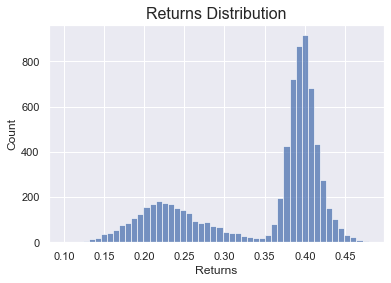

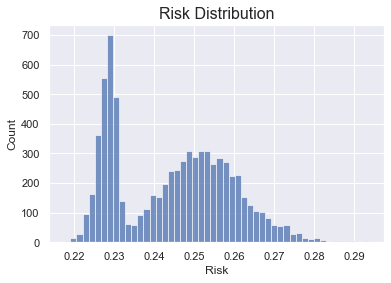

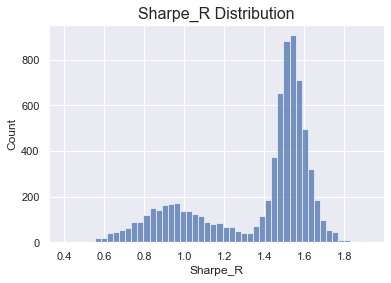

In [15]:
#Plot histograms for Return, Volatility, and Sharpe Distributions:
sea.set_theme()

for col in sim_port.columns[:3]:
    plt.figure()
    sea.histplot(sim_port[col], bins=50)
    plt.title(col + ' Distribution', fontsize=16)
    plt.show()

- The distributions show where portfolios containing these equity securities along with the used criteria can be found in terms of risk, return, and Sharpe ratio. With these, it can be seen where most lie and where the worst and best portfolio metrics can be found. For returns, it can be seen most are around 40% in annual returns, so any portfolio that can have something greater than that such as the ones at 45% are better than most. Inversely, those with portfolios to the left under 40% can be understood to be underperforming with the given conditions and assets. The same idea can be understood from the risks generated. As seen, most had a volatility right under 23% with quite a few being around 25%. The portfolios with risks above 23% and 26% can be seen as underperforming in regard to controlling risk under these conditions if that is an important aspect for the investor. Volatilities of 22% are the lowest and can be considered the best if one is seeking smaller risk under these conditions. Finally, most Sharpe ratios are under 1.6, so those above it can be seen as outperforming portfolios while those to the left under 1.5 can be seen as underperforming, for it means their excess returns relative to the risk-free rate are not that well off compared to the portfolio risk. 




- Finally, the most extreme portfolios can be found from all the simulations and randomly generated portfolios. This gives the highest return one, the smallest risk one, and the highest Sharpe ratio one. Along these, an average of all can be made to see the average portfolio found in terms of return and risk. These can all then be visually shown on an efficient frontier styled scatter plot to clearly see where all the portfolios lie relative to their metrics. Matplotlib can be used to build this graph:


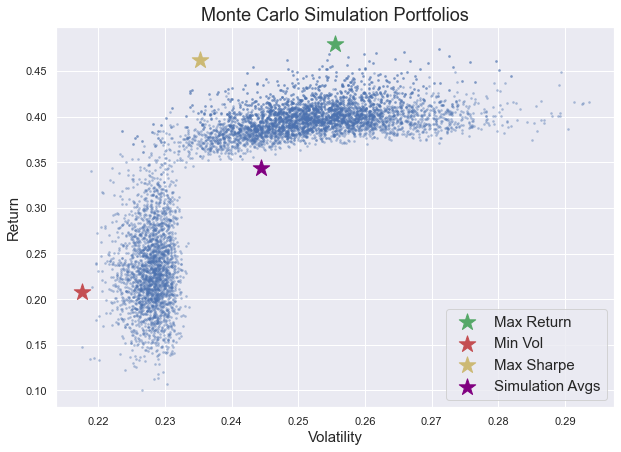

In [25]:
#Plotting All Portfolios, extremes (ex: max return), and average portfolio:
sim_max_return = sim_port.iloc[sim_port.Returns.idxmax()]   #Max return found in simulations
sim_min_vol = sim_port.iloc[sim_port.Risk.idxmin()]         #Min risk found
sim_max_sharpe = sim_port.iloc[sim_port.Sharpe_R.idxmax()]  #Max Sharpe Ratio found
sim_mean = sim_port.mean()                                  #Average portfolio found

#Making figure and plotting portfolios on a scatter plot:
plt.figure(figsize=(10,7)) 
plt.scatter(sim_port.Risk, sim_port.Returns, alpha=0.3, s=3)       
plt.scatter(sim_max_return[1], sim_max_return[0], s=300, c='g', marker='*',label='Max Return')
plt.scatter(sim_min_vol[1], sim_min_vol[0], s=300, c='r', marker='*', label='Min Vol')       
plt.scatter(sim_max_sharpe[1], sim_max_sharpe[0], s=300, marker='*', c='y', label='Max Sharpe') 
plt.scatter(sim_mean[1], sim_mean[0], s=300, c='purple', marker='*', label='Simulation Avgs') 
             
#Setting appropriate labels:
plt.xlabel('Volatility', fontsize=15)     
plt.ylabel('Return', fontsize=15)
plt.title('Monte Carlo Simulation Portfolios', fontsize=18)  
plt.legend(loc='lower right', fontsize=15)

plt.show()

- It can be seen how all of the portfolios compare to each other on the scatter plot built. All of the randomly generated portfolios are the small dots with each star representing its respective optimal portfolio. This visually exhibits how Monte Carlo simulations can find an optimal portfolio, for it covers essentially all possible scenarios. Here, an investor that wanted to maximize the returns could choose the green star portfolio while one that wanted to minimize risk above anything could choose the red star portfolio. Outside of these specific optimizations, one could use the efficient frontier created to find optimal portfolios that have the best return measure relative to specific levels of risk. As an example, it is clear how the maximum Sharpe ratio portfolio (yellow star) is a better choice than the average metrics portfolio (purple star) since it has a much higher return while still having a smaller amount of risk. 

## Conclusion:
----


Monte Carlo simulations can be easily implemented with the use of Python to bring some useful value in a financial setting regarding portfolio optimization. This can be used to build specific investment portfolios according to different investor preferences and goals. Furthermore, it can also help an investor analyze his or her portfolio relative to others, showing if his or her portfolio is underperforming, outperforming, or simply average. This technique can be very useful to investors, or anyone involved in analyzing investment portfolios as well as optimizing them. Greater number of simulations and random generated portfolios can still be performed for greater accuracy and utility. Along with this, other metrics can also be explored including other types of criteria and investor preferences to find different styles of portfolios. An example can be integrating socially responsible ideas such as ESG scores that explain a firm's ethical standards, and this can be examined with metrics like the ones used here to find the optimal portfolio that properly trades off one's ethical views with risk minimization.

# References:

- Advanced Financial Data Analytics (NJIT Course - Prof. Steve Taylor)